SCAN Disk Scheduling Simulation
Enter the initial head position: 78
Enter the total number of cylinders on the disk: 200
Enter the number of I/O requests: 12
Enter the I/O requests: 
82
170
43
140
24
16
190
150
36
39
148
7
Enter the initial direction (left or right): left

SCAN (Elevator) Disk Scheduling:
Seek Sequence Order: [43, 39, 36, 24, 16, 7, 0, 82, 140, 148, 150, 170, 190]
Total Seek Count: 268 NS


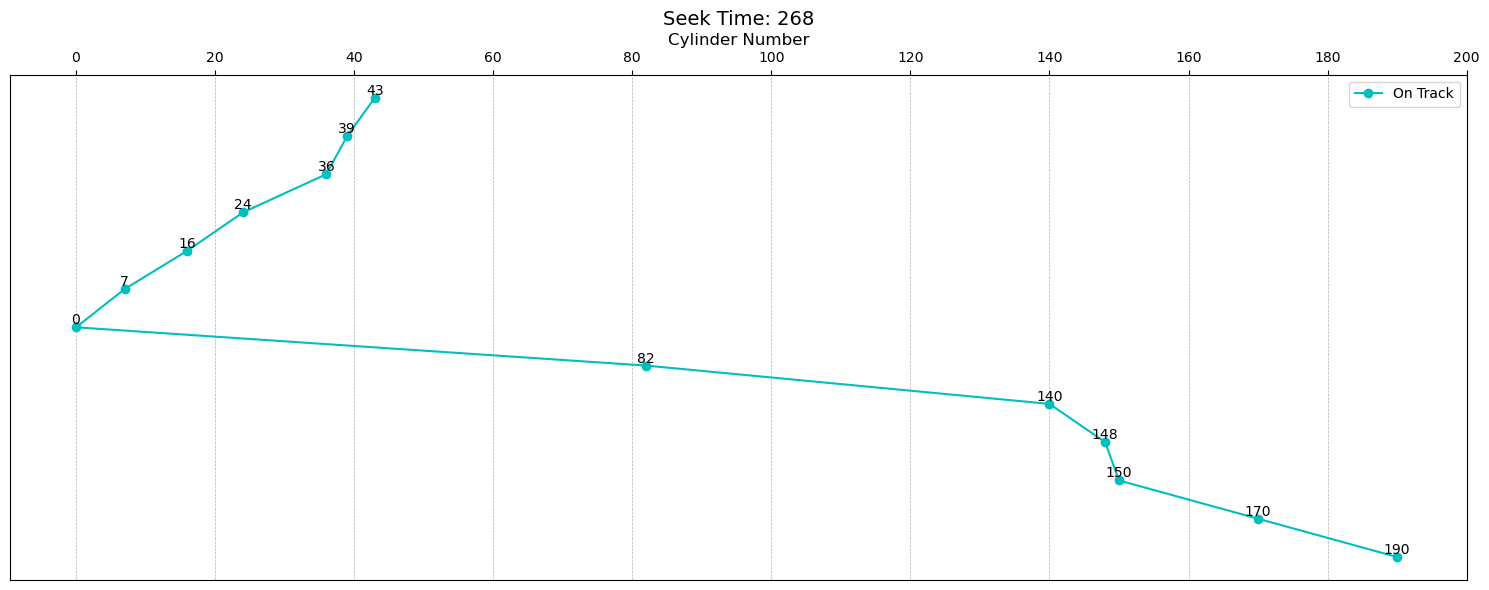

In [1]:
import matplotlib.pyplot as plt

#SCAN (ELEVATOR)ALGORITHM PYTHON CODE

def SCAN_disk_scheduling(requests, head, disk_size, direction):
   
    seek_count = 0
    current_track = 0

    # Separate requests into left and right based on the head position
    left = []
    right = []
    for request in requests:
        if request < head:
            left.append(request)
        elif request > head:
            right.append(request)

    # Sort the requests in both directions
    left.sort()
    right.sort()

  # Adding edge points(0 and 199(disk_size - 1)to simulate full SCAN
    if direction == "left":
        left.insert(0, 0)  # Include 0 if moving left
    elif direction == "right":
        right.append(disk_size - 1)  # Include disk_size - 1 if moving right

    seek_sequence = []
    run = 2  # Run twice to cover both directions
    while run:
        if direction == "left":
            # Process requests to the left
            for i in range(len(left) - 1, -1, -1):
                current_track = left[i]
                seek_sequence.append(current_track)
                seek_count += abs(current_track - head)
                head = current_track
            direction = "right"  # Switch direction
        elif direction == "right":
            # Process requests to the right
            for i in range(len(right)):
                current_track = right[i]
                seek_sequence.append(current_track)
                seek_count += abs(current_track - head)
                head = current_track
            direction = "left"  # Switch direction

        run -= 1

    return seek_sequence, seek_count

# graph function with 2 parameters
def plot_disk_movement(positions, seek_time): #positions list of cylinder positions visited by the disk head during the algorithm execution
    # total seek time for the disk head during the process    
    
    plt.figure(figsize=(15, 6)) # creates a figure with a specific size for the plot in width and length respectively
    # the track number, the order disk head visits each track, circular markers, color of the line, solid line and label  
    plt.plot(positions, range(len(positions)-1, -1, -1), marker='o', color='c', linestyle='-', label='On Track')
    
        # Annotate each position
     #Loops through each position and its index.
    for i, pos in enumerate(positions):
        plt.text(pos, len(positions) - i - 1, f'{pos}', fontsize=10, ha='center', va='bottom')



    # sets the title and labels 
    plt.title(f'Seek Time: {seek_time}', fontsize=14)
    plt.xlabel('Cylinder Number', fontsize=12)
    plt.ylabel('Movement Order', fontsize=12)
    # shows grid lines on both axes
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
     # Move x-axis labels to the top
    ax = plt.gca()
    ax.tick_params(axis='x', which='both', labelbottom=False, bottom=False, top=True, labeltop=True)
    ax.xaxis.set_label_position('top')

    # Hide the y-axis
    plt.gca().axes.get_yaxis().set_visible(False)

    
    
    # Set x-axis ticks in increments of 5
    max_pos = max(positions) #  Finds the maximum cylinder number visited by the disk head
    ticks = range(0, max_pos + 20, 20) #Creates a range for t he x-axis ticks from 0 to the maximum track request number, with a step size of 20.  every 20 tracks.
    plt.xticks(ticks)

    #displays the legend, adjusts layout  and shows final plot
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def main():
    print("SCAN Disk Scheduling Simulation")

    # Input:Initial head position
    head = int(input("Enter the initial head position: "))
    if head < 0:
        print("Error: Head position must be a non-negative integer.")
        return

    # Input:Total number of cylinders on the disk
    disk_size = int(input("Enter the total number of cylinders on the disk: "))
    if disk_size <= 0:
        print("Error: Disk size must be a positive integer.")
        return

    # Input: Number of I/O requests
    n = int(input("Enter the number of I/O requests: "))
    if n <= 0:
        print("Error: Number of requests must be a positive integer.")
        return

    # Input:I/O requests
    requests = []
    print("Enter the I/O requests: ")
    for i in range(n):
        req = int(input())
        if req < 0 or req >= disk_size:
            print(f"Error: Request {req} is invalid. It must be in the range [0, {disk_size - 1}].")
            return
        requests.append(req)

    # Input:Initial direction
    direction = input("Enter the initial direction (left or right): ").lower()
    if direction not in ["left", "right"]:
        print("Error: Invalid direction. Please enter 'left' or 'right'.")
        return

    # SCAN(Elevator) Algorithm Output
    scan_sequence, scan_seek_count = SCAN_disk_scheduling(requests, head, disk_size, direction)
    print("\nSCAN (Elevator) Disk Scheduling:")
    print("Seek Sequence Order:", scan_sequence)
    print("Total Seek Count:", scan_seek_count, "NS")
    plot_disk_movement(scan_sequence, scan_seek_count)

if __name__ == "__main__":
    main() ## Run main() only if the script is executed directly
